In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url="https://drive.google.com/file/d/1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y/view?usp=drive_link"
url="https://drive.google.com/uc?id="+ url.split("/")[-2]
df=pd.read_csv(url)

Task 1: Restaurant Reviews

Analyze the text review to identify the most common postive and negative keywords.

In [4]:
positive_data=df.loc[df['Aggregate rating']>=2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

['Excellent' 'Very Good' 'Good' 'Average']


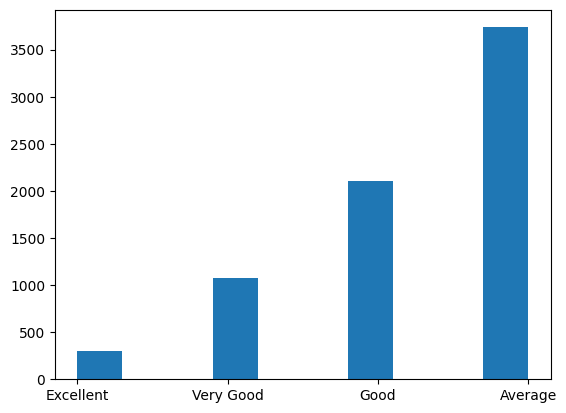

In [7]:
positive_keywords = positive_data['Rating text'].unique()
print(positive_keywords)

plt.hist(positive_data['Rating text'], label=positive_keywords)
plt.show()

In [9]:
negative_data=df.loc[(df['Aggregate rating'] <2.5) & (df['Aggregate rating'] > 0)]
negative_keywords =negative_data['Rating text'].unique()
print(negative_keywords) 

['Poor']


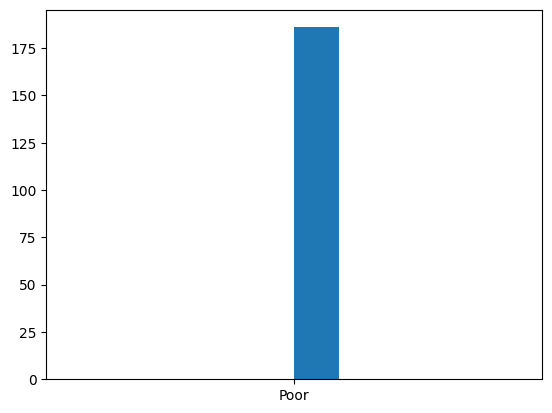

In [11]:
plt.hist(negative_data['Rating text'], label=negative_keywords)
plt.show()

Task 2: Votes Analysis

identify the restaurant with highest and lowest number of votes

In [12]:
Highest_voted_resturant=df.groupby('Restaurant Name')['Votes'].sum().sort_values (ascending=False)
Highest_voted_resturant=Highest_voted_resturant.idxmax()
lowest_rated_resturant=df.groupby('Restaurant Name')['Votes'].sum().sort_values()
lowest_rated_resturant=lowest_rated_resturant.idxmin()
print("The Highest Voted Resturent is: ",Highest_voted_resturant)
print("The Lowest Voted Resturent is: ",lowest_rated_resturant)

The Highest Voted Resturent is:  Barbeque Nation
The Lowest Voted Resturent is:  Laxmi Food Corner


Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [14]:
corelation=np.corrcoef(df["Votes"],df['Aggregate rating'])
corelation-np.round(corelation, 2)
print(corelation)

[[1.         0.31369058]
 [0.31369058 1.        ]]


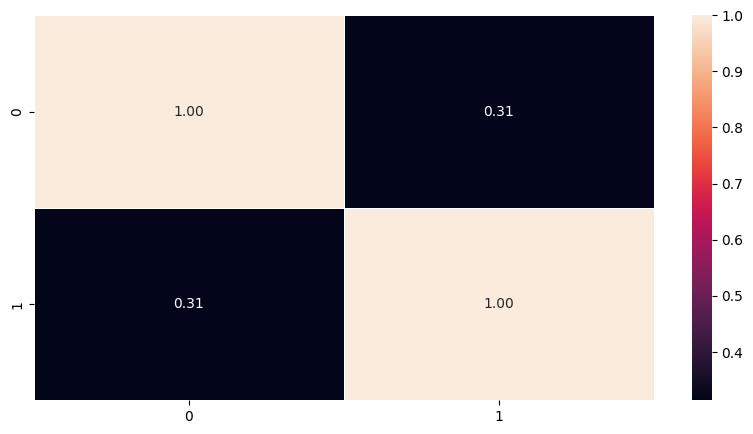

In [20]:
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(corelation, annot=True, fmt=".2f", linewidth=.4)
plt.show()

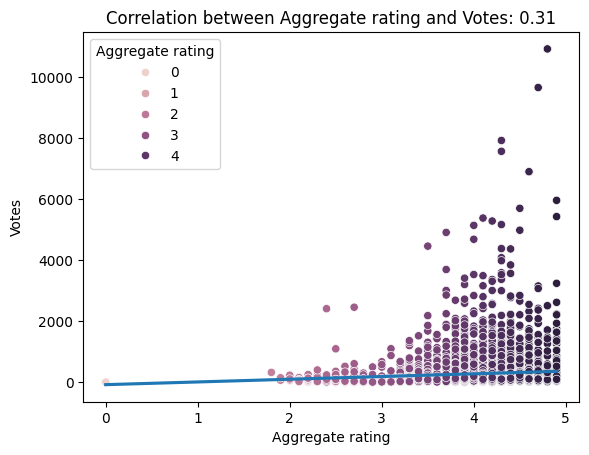

As per result corelation value - 0.31, which indicates there is a moderate positive corelation between these two variables.


In [22]:
sns.scatterplot(data=df, y = 'Votes', hue ='Aggregate rating', x='Aggregate rating' )
sns.regplot(data=df, x='Aggregate rating', y='Votes', scatter=False)
plt.title("Correlation between Aggregate rating and Votes: 0.31")
plt.show()
print("As per result corelation value - 0.31, which indicates there is a moderate positive corelation between these two variables.")

Task3: Price Range vs. Online Delivery and Table Booking

Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

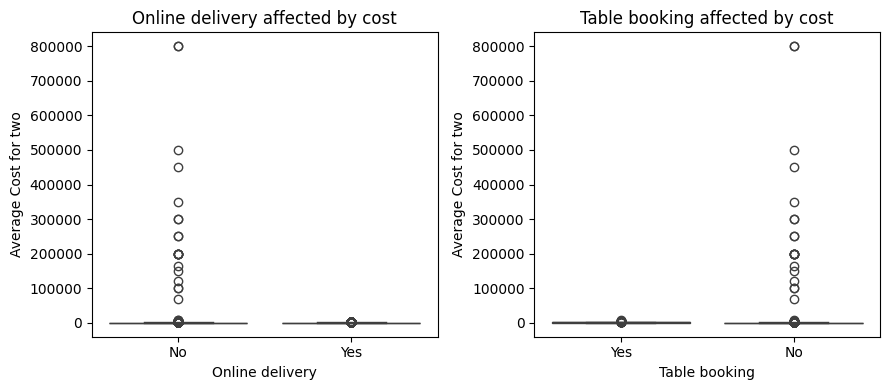

In [24]:
x1 =df['Has Online delivery']
y =df['Average Cost for two']
x2=df['Has Table booking']
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y=y)
plt.xlabel('Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Online delivery affected by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2,y=y)
plt.xlabel('Table booking')
plt.ylabel('Average Cost for two')
plt.title('Table booking affected by cost')
plt. tight_layout()
plt.show()

Determine if higher-priced restaurants are more likely to offer these services.

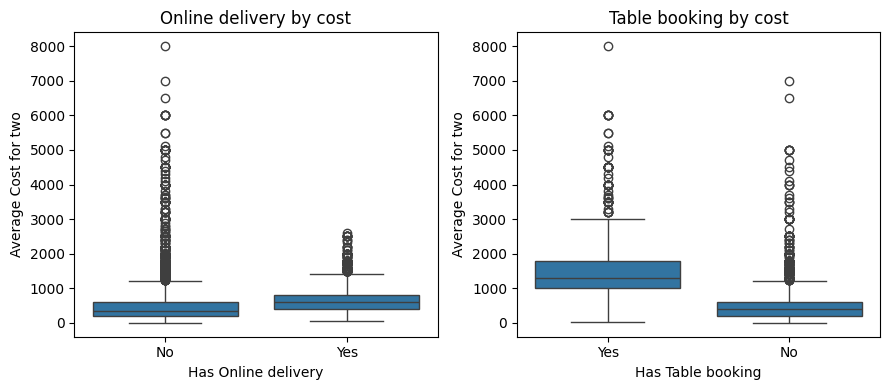

In [25]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000] )
plt.title('Online delivery by cost')
plt.subplot(1,2,2)
sns.boxplot (x=x2, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000] )
plt.title('Table booking by cost')
plt.tight_layout()
plt.show()

In [27]:
print("The Online delivery facility is present for only those resturent of average cost is :less than 1000. ")
print(" The Table booking facility is available in restaurants with an average cost ranging from :1000 to 2000. ")

The Online delivery facility is present for only those resturent of average cost is :less than 1000. 
 The Table booking facility is available in restaurants with an average cost ranging from :1000 to 2000. 
